In [0]:
# libs import
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.models import Sequential
from keras import models, layers
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from tensorflow.python.util import deprecation

import matplotlib.pyplot as plt
import numpy as np
import keras

Using TensorFlow backend.


In [0]:
# fetching dataset
dataset = fetch_openml('mnist_784')

In [0]:
# reshaping
data = dataset.data.reshape((dataset.data.shape[0], 28, 28))

# reshaping + add new axis
data = data[:, :, :, np.newaxis]

In [0]:
# skalakan dari range 0-255 menjadi range 0-1
scaled_data = data / 255.0

In [0]:
# split training & test
(x_train, x_test, y_train, y_test) = train_test_split(
    scaled_data,
    dataset.target.astype("float32"), 
    test_size = 0.20)

In [0]:
# transformasi target training dengan one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)

# transformasi target testing dengan one-hot encoding
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# instantiasikan model sequential kosong
model = Sequential()

In [0]:
# suppress warning
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
# C1
# Convolutional
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation="tanh", input_shape=(28,28,1), padding="same"))

# S2
# Pooling
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

# C3
# Convolutional
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation="tanh", padding="valid"))

# S4
# Pooling
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

# C5
# Fully Connected Convolutional
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation="tanh", padding="valid"))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 
# Fully Connected
model.add(layers.Dense(84, activation="tanh"))

# Output Layer (softmax activation)
# Fully Connected
model.add(layers.Dense(10, activation="softmax"))

NameError: ignored

In [0]:
# model compiling
model.compile(
    loss=keras.losses.categorical_crossentropy, 
    optimizer="SGD", 
    metrics=["accuracy"]
    )

In [0]:
# epoch 100
hist = model.fit(
    x=x_train,y=y_train, 
    epochs=100, batch_size=128, 
    validation_data=(x_test, y_test), 
    verbose=1
    )

Train on 56000 samples, validate on 14000 samples
Epoch 1/100
56000/56000 [==============================] - 3s 55us/step - loss: 0.7277 - acc: 0.8132 - val_loss: 0.3618 - val_acc: 0.8964
Epoch 2/100
56000/56000 [==============================] - 3s 48us/step - loss: 0.3119 - acc: 0.9121 - val_loss: 0.2789 - val_acc: 0.9195
Epoch 3/100
56000/56000 [==============================] - 3s 48us/step - loss: 0.2556 - acc: 0.9271 - val_loss: 0.2396 - val_acc: 0.9308
Epoch 4/100
56000/56000 [==============================] - 3s 47us/step - loss: 0.2229 - acc: 0.9368 - val_loss: 0.2120 - val_acc: 0.9385
Epoch 5/100
56000/56000 [==============================] - 3s 49us/step - loss: 0.1993 - acc: 0.9429 - val_loss: 0.1935 - val_acc: 0.9449
Epoch 6/100
56000/56000 [==============================] - 3s 49us/step - loss: 0.1814 - acc: 0.9480 - val_loss: 0.1801 - val_acc: 0.9489
Epoch 7/100
56000/56000 [==============================] - 3s 47us/step - loss: 0.1668 - acc: 0.9526 - val_loss: 0.1660 - 

In [0]:
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

14000/14000 [==============================] - 1s 64us/step
Test loss 0.0341, accuracy 98.89%


Text(0, 0.5, 'acc')

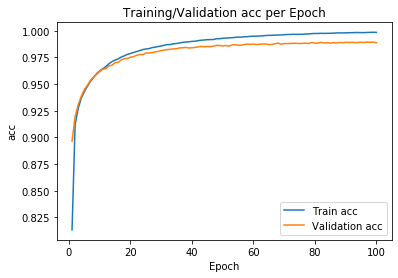

In [0]:
#plotting
f, ax = plt.subplots()
ax.plot([None] + hist.history["acc"])
ax.plot([None] + hist.history["val_acc"])

ax.legend(["Train acc", "Validation acc"], loc = 0)
ax.set_title("Training/Validation acc per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("acc") 

Text(0, 0.5, 'acc')

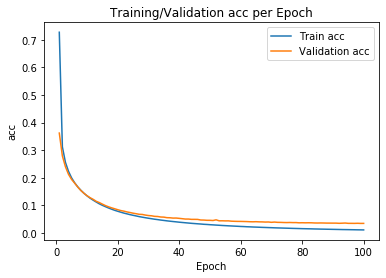

In [0]:
#plotting
f, ax = plt.subplots()
ax.plot([None] + hist.history["loss"])
ax.plot([None] + hist.history["val_loss"])

ax.legend(["Train acc", "Validation acc"], loc = 0)
ax.set_title("Training/Validation acc per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("acc")